### For Linear Regression      :   y = mx + c
### For Multiple Regression   :   y = mx1 + mx2 ......... + c

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values ## last column
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder' , OneHotEncoder() , [3])] , remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [13]:
X[2]

array([0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54], dtype=object)

### Split training and testing

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 ,  random_state = 0)

### Following class used takes care of 1) Dummy variable trap 2) No need to find best features according to P-value


In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

### Results 

In [17]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2) ## 2 decimals
print(np.concatenate((y_pred.reshape(len(y_pred),1) , y_test.reshape(len(y_test) , 1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [31]:
import seaborn as sns

In [27]:
X_train.shape

(40, 6)

<AxesSubplot:>

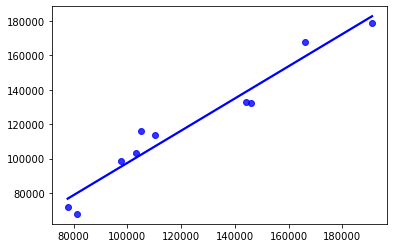

In [33]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

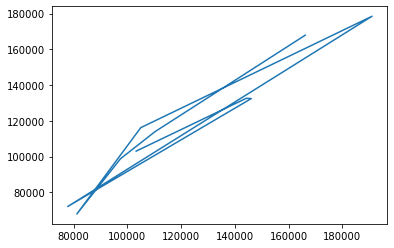

In [34]:
plt.plot(y_test , y_pred)